In [4]:
metebolite = read.csv('./LM2021-12430-东部战区总医院-小鼠肠道组织//LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/3.数据矩阵/metabolomics_data-new.csv',check.names = F)

In [6]:
cnumber = read.csv('/data/workdirV6/cnumber.csv')

In [7]:
head(cnumber,2)

,Metabolites,kegg
,<chr>,<chr>
1,4-Aminohippuric acid,D06890
2,Imidazolepropionic acid,C20522


In [5]:
head(metebolite,3)

,Metabolites,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,KO-CLP8,KO-NC1,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"LysoPC(20:4(5Z,8Z,11Z,14Z))",86674.91,218881.9,280332.4,178108.1,119883.5,32693.82,345224.2,119606,153810.9,⋯,20661.54,104916,5804.184,133204.6,243141,277966.9,146089.6,230441.2,140556.2,298852.5
2,LysoPC(18:0),2009726.48,3334212.1,2450525.1,2989967.5,1876162.6,348891.23,2963804.6,2351682,2083188.4,⋯,263312.66,1680189,207871.058,1864903.1,2001310,3029537.8,1408620.2,2274919.8,1574928.0,2431254.0
3,LysoPC(16:0),1579107.80,3615409.8,2907057.4,2807052.4,1526425.9,322352.47,2937266.5,2201086,2147221.6,⋯,226300.02,1396375,86323.033,2145121.0,2460418,3234021.7,1665112.1,2431493.2,1641919.2,3368434.8


In [18]:
count = dplyr::left_join(cnumber,metebolite)

Joining with `by = join_by(Metabolites)`


In [9]:
library(openxlsx)

Warning message:
“package ‘openxlsx’ was built under R version 4.2.3”


In [13]:
wtclpvswtnc <- read.xlsx("./LM2021-12430-东部战区总医院-小鼠肠道组织//LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/6.差异代谢物/差异代谢物.xlsx", sheet = 2)

In [14]:
koclpvswtclp <- read.xlsx("./LM2021-12430-东部战区总医院-小鼠肠道组织//LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/6.差异代谢物/差异代谢物.xlsx", sheet = 4)

In [15]:
diffkegg = c(wtclpvswtnc$kegg,koclpvswtclp$kegg)

In [17]:
diffkegg = na.omit(diffkegg)

In [22]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [24]:
diffcount = count %>% filter(kegg %in% diffkegg)

In [26]:
pathway = read.csv('/data/workdirV6/KEGG_COMPOUND_PATHWAY_mmu.csv')

In [28]:
pathway = pathway[,c('CLASS2','COMPOUND')]

In [46]:
head(pathway,3)

,kegg,pathwayname
,<chr>,<chr>
1,C00022,Carbohydrate metabolism
2,C00024,Carbohydrate metabolism
3,C00031,Carbohydrate metabolism


In [34]:
colnames(pathway) = c('pathwayname','kegg')

In [39]:
pathway = pathway[,c(2,1)]

In [40]:
dim(diffcount)

[1] 143  34

In [45]:
head(diffcount,2)

,kegg,Metabolites,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,KO-CLP8,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C19757,cis-3-Hexenyl acetate,45794.45,76341.48,58194.13,73416.85,53127.72,45883.151,61096.98,44034.57,⋯,53890.50,36090.9,54001.99,79989.81,53538.77,48903.80,69282.73,42279.166,46072.709,39535.87
2,C17726,"3a,6b,7b-Trihydroxy-5b-cholanoic acid",163909.11,30727.82,47860.76,184455.95,34108.22,9316.457,76462.61,388043.48,⋯,50965.47,190747.6,72527.58,36388.68,20157.44,49287.17,37491.88,4341.456,6578.723,32421.40


In [42]:
diffcount = diffcount[,c(2,1,3:34)]

In [137]:
heat = merge(pathway,diffcount,by = 'kegg')

In [138]:
heat = unique(heat)

In [139]:
head(heat,3)

,kegg,pathwayname,Metabolites,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C00026,Excretory system,Oxoglutaric acid,125665.5,166138.2,97528.52,171784.7,204491.5,153601.3,126183.2,⋯,177906.5,147408,105980.6,100763.9,79176.55,108491.1,85137.72,104690.1,129015.7,99391.22
2,C00026,Amino acid metabolism,Oxoglutaric acid,125665.5,166138.2,97528.52,171784.7,204491.5,153601.3,126183.2,⋯,177906.5,147408,105980.6,100763.9,79176.55,108491.1,85137.72,104690.1,129015.7,99391.22
4,C00026,Nervous system,Oxoglutaric acid,125665.5,166138.2,97528.52,171784.7,204491.5,153601.3,126183.2,⋯,177906.5,147408,105980.6,100763.9,79176.55,108491.1,85137.72,104690.1,129015.7,99391.22


In [140]:
heat <- heat[!duplicated(heat$kegg), ]

In [141]:
zhu = data.frame(table(heat$pathwayname))

zhu$ID <- as.numeric(rownames(zhu))

In [142]:
number_of_bar <- nrow(zhu)
angle <-  90 - 360 * (zhu$ID-0.5) /23
zhu$hjust<-ifelse(angle < -90, 1, 0)
zhu$angle<-ifelse(angle < -90, angle+180, angle)

In [143]:
library(ggplot2)

In [148]:
p1 <- ggplot(zhu, aes(x=ID, y=Freq))+
  geom_bar(stat="identity", fill="blue", alpha=0.7) +
  ylim(-75,75) +#y轴范围，控制内圆大小与条形大小
  theme_minimal() +#主题
  theme(axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        plot.margin = unit(rep(-1,4), "cm")) +#调整边缘以使得标签不会被截断
  coord_polar(start = 0) +#极坐标
  geom_text(data=zhu, aes(x=ID, y=Freq+10, label=Var1, hjust=hjust), 
            color="black", fontface="bold",alpha=0.6, size=6, 
            angle= zhu$angle, inherit.aes = F) #标签


In [149]:
options(repr.plot.height = 16,repr.plot.width = 16 )

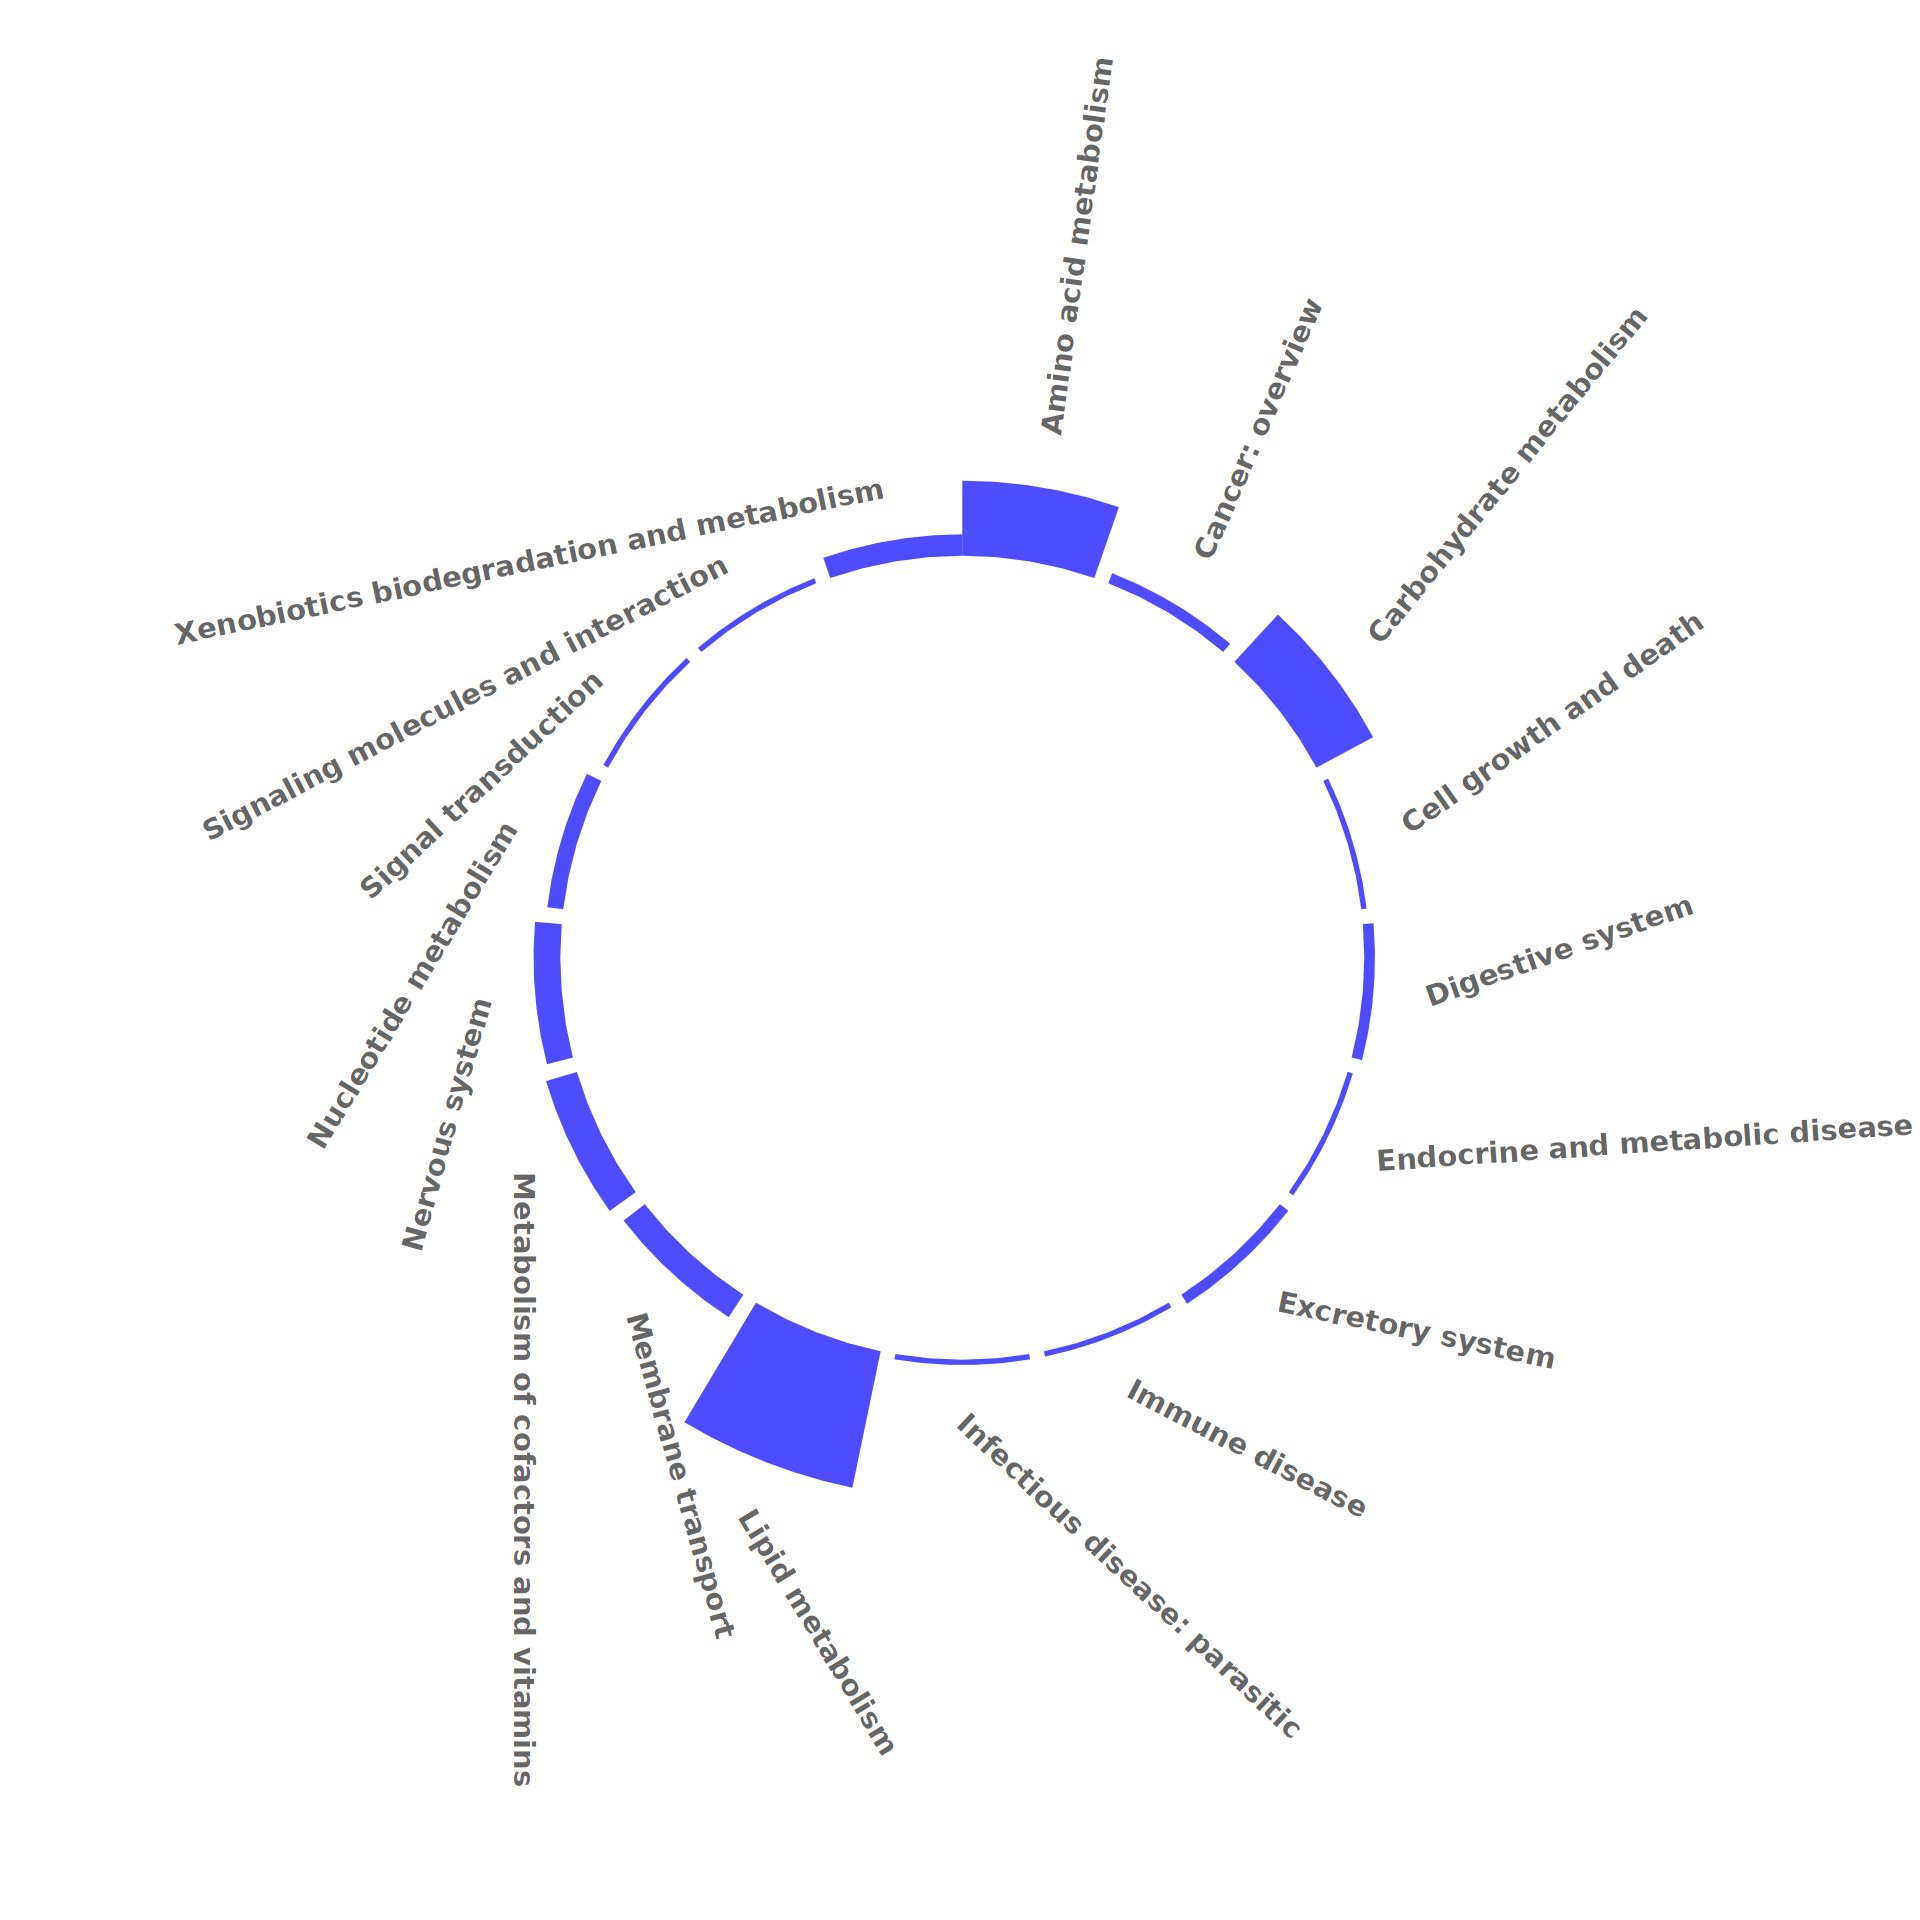

In [150]:
p1

In [151]:
ggsave('./zhuzi.pdf',height = 16,width = 16)

In [166]:
dim(heat1)

[1] 42 35

In [417]:
heat1 = heat %>% filter(pathwayname	 %in% c('Amino acid metabolism',
                                           'Carbohydrate metabolism',
                                           'Lipid metabolism',
                                           'Metabolism of cofactors and vitamins',
                                           'Membrane transport',
                                           'Nervous system'))

In [418]:
table(heat1$pathwayname)


               Amino acid metabolism              Carbohydrate metabolism 
                                  14                                   12 
                    Lipid metabolism                   Membrane transport 
                                  26                                    5 
Metabolism of cofactors and vitamins                       Nervous system 
                                   6                                    5 

In [419]:
dim(heat1)

[1] 68 35

In [461]:
matrix = as.matrix(heat1[1:68,4:35])

In [462]:
matrixraw = matrix

In [463]:
library(matrixStats)
matrix = (matrix - rowMeans(matrix))/rowSds(matrix)

In [464]:
#matrix <- as.data.frame(t(apply(matrixraw, 1, function(x)(2*(x-min(x))/(max(x)-min(x)))- 1)))

In [465]:
# matrix= scale(matrixraw, center = TRUE, scale = TRUE)

In [466]:
rownames(matrix) <- heat1$Metabolites

In [467]:
sample_annotation <- data.frame(
  Type = c(rep('KO_CLP',8),
            rep('KO_NC',8),
           rep('WT_CLP',8),          
           rep('WT_NC',8)
          )
)

In [468]:
rownames(sample_annotation) <- colnames(matrix)

In [469]:
gene_annotation <- data.frame(
  GeneType = heat1$pathwayname
)

In [470]:
gene_annotation$GeneType = gsub(' ','_',gene_annotation$GeneType)

In [471]:
rownames(gene_annotation) <- rownames(matrix)

In [472]:
row_colors <- list(
  PathwayName = c(Amino_acid_metabolism = "#FFC0CB", Carbohydrate_metabolism = "#FFB6C9", Lipid_metabolism = "#FF69B4",
          Metabolism_of_cofactors_and_vitamins = "#1B9E77", Membrane_transport = "#D95F02", Nervous_system = "#7570b3")
)

In [473]:
col_colors <- list(
  Group = c(KO_CLP= "#add8e6", WT_CLP = "#87CEFA", KO_NC = "#4682B4",WT_NC = '#FF69B4')
)

In [474]:
library(ComplexHeatmap)

In [475]:
ha_col = HeatmapAnnotation(df = sample_annotation, col = col_colors)
ha_row = rowAnnotation(GeneType = gene_annotation$GeneType, col = row_colors)

In [476]:
p = Heatmap(matrix, # 表达矩阵a
       top_annotation = ha_col, # 列注释对象
        left_annotation = ha_row,
        
 # 行注释对象
        cluster_rows = TRUE, 
      cluster_columns = TRUE,
        show_row_names = TRUE,
      show_column_names = TRUE,
        column_split = sample_annotation$Type, # 按样本类型分组
        row_split = gene_annotation$GeneType,   # 按基因类型分组
        column_title = "Expression Matrix",
        row_title = "Pathway name ")

In [478]:
pdf('heatmap.pdf',height = 14,width = 12)
print(p)
dev.off()

png 
  2